# 6.3 Geographic Visualization

This script contains: 
1. Import data and libraries
2. Data wrangling and cleaning
3. Check for extreme values
4. Plotting a choropleth
5. Results

In [1]:
#1. Import data and libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import os
import folium
import json
import plotly
import plotly.express as px

In [2]:
# This command propts matplotlib visuals to appear in the notebook 
%matplotlib inline

In [9]:
#Import 'GEOjson' file for the world
world_geo=r'C:\Users\alexl\Downloads\archive (16)\world-countries.json'

In [10]:
# That's just in case you want to look at the JSON file contents here too:
f = open(r'C:\Users\alexl\Downloads\archive (16)\world-countries.json',)
  
# returns JSON object asa dictionary
data = json.load(f)
  
# Iterating through the json list
for i in data['features']:
    print(i)

{'type': 'Feature', 'properties': {'name': 'Afghanistan'}, 'geometry': {'type': 'Polygon', 'coordinates': [[[61.210817, 35.650072], [62.230651, 35.270664], [62.984662, 35.404041], [63.193538, 35.857166], [63.982896, 36.007957], [64.546479, 36.312073], [64.746105, 37.111818], [65.588948, 37.305217], [65.745631, 37.661164], [66.217385, 37.39379], [66.518607, 37.362784], [67.075782, 37.356144], [67.83, 37.144994], [68.135562, 37.023115], [68.859446, 37.344336], [69.196273, 37.151144], [69.518785, 37.608997], [70.116578, 37.588223], [70.270574, 37.735165], [70.376304, 38.138396], [70.806821, 38.486282], [71.348131, 38.258905], [71.239404, 37.953265], [71.541918, 37.905774], [71.448693, 37.065645], [71.844638, 36.738171], [72.193041, 36.948288], [72.63689, 37.047558], [73.260056, 37.495257], [73.948696, 37.421566], [74.980002, 37.41999], [75.158028, 37.133031], [74.575893, 37.020841], [74.067552, 36.836176], [72.920025, 36.720007], [71.846292, 36.509942], [71.262348, 36.074388], [71.498768,

In [16]:
path=r'C:\Users\alexl\CareerFoundry\World Happiness Report 2015-2019'

In [19]:
#Import data
df_clean=pd.read_csv(os.path.join(path, '02. Data', 'Prepared Data', 'df_clean.csv'), index_col=False)

In [20]:
df_clean.head()

,Unnamed: 0,Year,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,0,2019,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,1,2019,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,2,2019,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,3,2019,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,4,2019,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [21]:
df_clean.shape

(781, 11)

In [23]:
#2. Data wrangling and cleaning
df_clean.columns

Index(['Unnamed: 0', 'Year', 'Overall rank', 'Country or region', 'Score',
       'GDP per capita', 'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')

In [26]:
#Delete unnecessary columns
df_clean=df_clean.drop(columns=['Unnamed: 0'])

In [27]:
df_clean.columns

Index(['Year', 'Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')

In [28]:
#Recheck shape
df_clean.shape

(781, 10)

In [30]:
#Check for duplicates
df_clean.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
776    False
777    False
778    False
779    False
780    False
Length: 781, dtype: bool

no duplicates

In [31]:
#Check missing values
df_clean.isnull().sum()

Year                            0
Overall rank                    0
Country or region               0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
dtype: int64

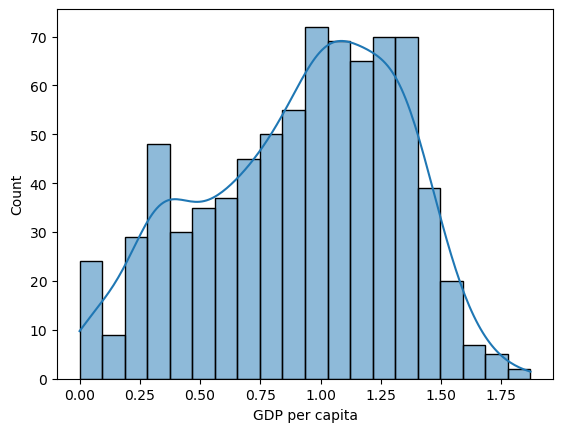

In [35]:
#3. Checking for extreme values
hist_GDP=sns.histplot(df_clean['GDP per capita'], bins=20, kde=True)

In [36]:
#Saved histogram
hist_GDP.figure.savefig(os.path.join(path, '04. Analysis', 'Visualizations', 'hist_GDP.png'), bbox_inches='tight')

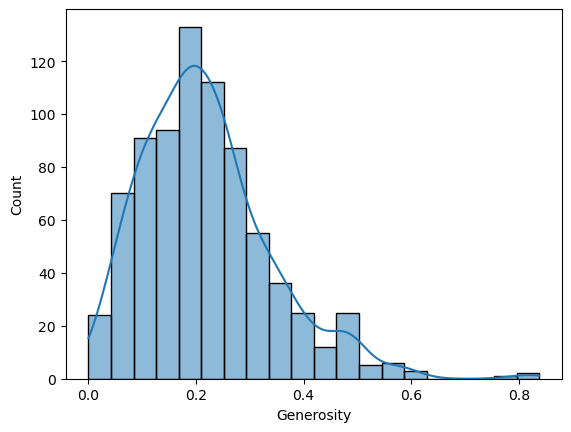

In [40]:
#Create a histogram for generosity
hist_Generosity=sns.histplot(df_clean['Generosity'], bins=20, kde=True)

In [46]:
#Saved histogram
hist_Generosity.figure.savefig(os.path.join(path, '04. Analysis', 'hist_Generosity.png'), bbox_inches='tight')

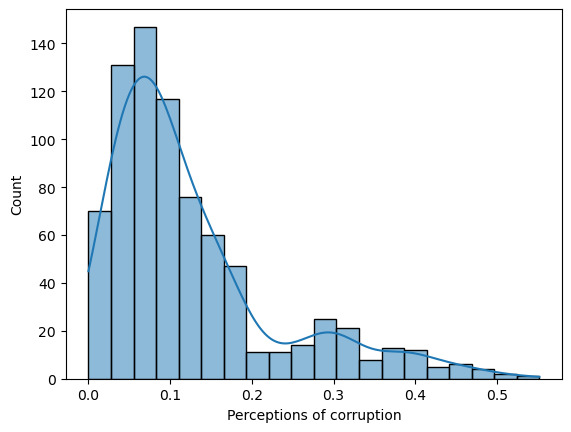

In [47]:
#Create a histogram for extreme values for Perceptions of corruption
hist_Corruption=sns.histplot(df_clean['Perceptions of corruption'], bins=20, kde=True)

In [45]:
#Saved histogram
hist_Corruption.figure.savefig(os.path.join(path, '04. Analysis', 'Visualizations', 'hist_Corruption.png'), bbox_inches='tight')

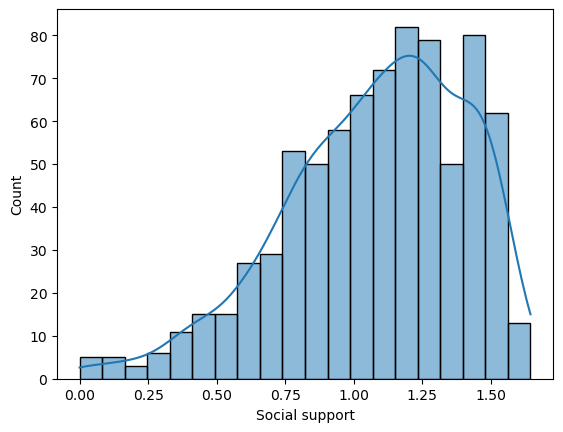

In [57]:
#Create a histogram for extreme values for social support
hist_Corruption=sns.histplot(df_clean['Social support'], bins=20, kde=True)

In [58]:
#Saved histogram
hist_Corruption.figure.savefig(os.path.join(path, '04. Analysis', 'Visualizations', 'hist_Social_support.png'), bbox_inches='tight')

# Plotting a Choropleth

In [59]:
#Create dataframe with just the countries and the values for overall rank
data_to_plot=df_clean[['Country or region', 'Overall rank']]
data_to_plot.head(100)

,Country or region,Overall rank
0,Finland,1
1,Denmark,2
2,Norway,3
3,Iceland,4
4,Netherlands,5
...,...,...
95,Cameroon,96
96,Bulgaria,97
97,Ghana,98
98,Ivory Coast,99


In [51]:
#Setup a folium map 
map = folium.Map(location = [100, 0], zoom_start = 1.5)

# Choropleth maps bind Pandas Data Frames and json geometries.This allows us to quickly visualize data combinations
folium.Choropleth(
    geo_data = world_geo, 
    data = data_to_plot,
    columns = ['Country or region', 'Overall rank'],
    key_on = 'feature.properties.name', # this part is very important - check your json file to see where the KEY is located
    fill_color = 'YlOrRd', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "Overall rank of Country").add_to(map)
folium.LayerControl().add_to(map)

map

In [52]:
#Save the map as an HTML file
map.save('interactive_map.html')

# Results

Based on the histograms, GDP per capita and Social support have a relatively similar shape and thus correlation, while being in contrast to generosity and perceptions of corruption, which more or less corrolate with each other. This is curious because while conceptually social services and generosity may seem to align, they do not show in these resutls. This makes me think of government funded allocations, which demographics this may include vs disclude, and if one form of dispersing resources is more comprehensive. And whether this data is aligning to answer these questions. It is also curious to note which countries are excluded from the data and why determined by darker colors. 